# Regresja

### Regresja liniowa

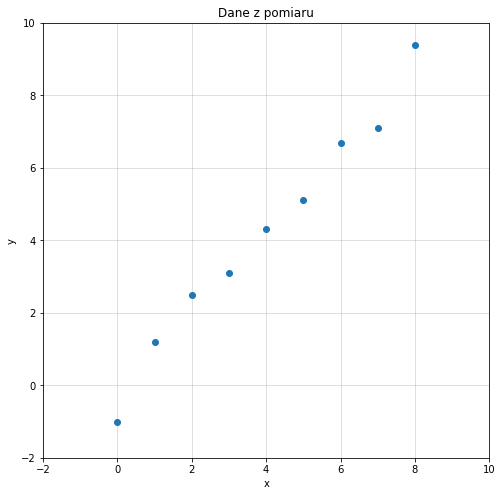

In [1]:
from matplotlib import pyplot as pl
import numpy as np


x = np.arange(0,11) #0..10
y = np.single([-1,1.2,2.5,3.1,4.3,5.1,6.7,7.1,9.4,12,13])

pl.figure(figsize=[8,8], facecolor="white")
pl.title("Dane z pomiaru")
pl.xlabel('x')
pl.ylabel("y")
pl.axis([-2,10,-2,10])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'o')
pl.show()

[1.31181817] -0.7954545237801316


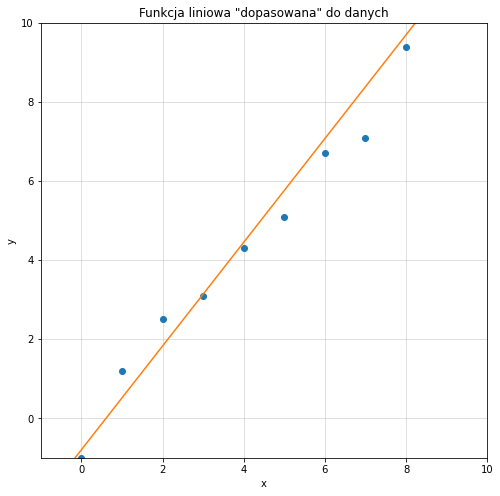

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as pl

x.shape = (-1,1)
# print(x,y)

reg = LinearRegression().fit(x,y)

print(reg.coef_, reg.intercept_)

a = reg.coef_[0]
b = reg.intercept_

X = np.arange(-10,10)
X.shape = (-1,1)

Y = reg.predict(X)

pl.figure(figsize=[8,8], facecolor="white")
pl.title("Funkcja liniowa \"dopasowana\" do danych")

pl.xlabel('x')
pl.ylabel("y")
pl.axis([-1,10,-1,10])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'o')
pl.plot(X,Y,'-')
pl.show()



### Regresja wielomianowa

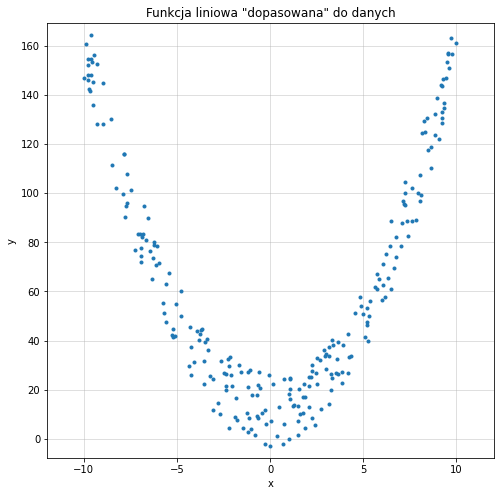

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl

data = pd.read_csv("../Data/dane_fkw2.csv",delimiter=";", decimal=",")

x = np.single(data['x'])
y = np.single(data['y'])

pl.figure(figsize=[8,8], facecolor="white")
pl.title("Funkcja liniowa \"dopasowana\" do danych")

pl.xlabel('x')
pl.ylabel("y")
pl.axis([x.min()-2,x.max()+2,y.min()-5,y.max()+5])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'.')
pl.show()

0.9484023173873419
[ 0.0000000e+00  1.7109811e-05  1.5525490e-06  7.7841696e-06
  7.4222698e-05  1.6081826e-04  1.7193392e-03 -6.7120536e-06
 -3.1769392e-05  5.7395081e-08  1.6095692e-07] 22.536232


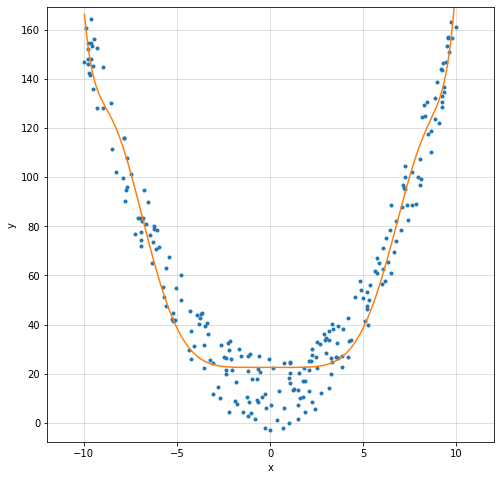

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x.shape = (-1,1)

pf = PolynomialFeatures(2)
X = pf.fit_transform(x)

reg = LinearRegression()
reg.fit(X,y)
print(reg.score(X,y))
print(reg.coef_, reg.intercept_)

x_test = np.arange(min(x),max(x),0.1)
x_test.shape = (-1,1)

pl.figure(figsize=[8,8], facecolor="white")
pl.plot(x,y,'.')
pl.plot(x_test,reg.predict(pf.fit_transform(x_test)),'-')
pl.xlabel('x')
pl.ylabel("y")
pl.axis([x.min()-2,x.max()+2,y.min()-5,y.max()+5])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.show()

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.arange(-10,11)
y = np.random.randint(4,size=(21,1))-2
x.shape = (-1,1)

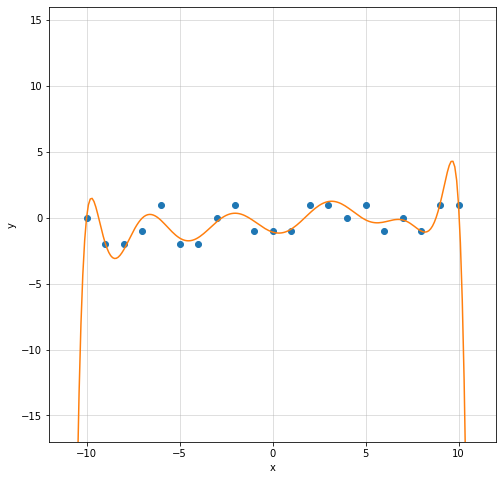

In [9]:
pf = PolynomialFeatures(13)

X = pf.fit_transform(x)
reg = LinearRegression()
reg.fit(X,y)

xi = np.arange(min(x)-2,max(x)+2,0.1)
xi = xi.reshape(len(xi),1) 

pl.figure(figsize=[8,8], facecolor="white")
pl.plot(x,y,'o')
pl.plot(xi,reg.predict(pf.fit_transform(xi)),'-')
pl.xlabel('x')
pl.ylabel("y")
pl.axis([x.min()-2,x.max()+2,y.min()-15,y.max()+15])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.show()

### Regresja logistyczna

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

dane = pd.read_csv('../Data/dane_wzrost.csv', sep=';', decimal=',')

print(dane)

Pomiar = dane.iloc[:,0:4]
Wynik = dane.iloc[:,4]


X = np.array(Pomiar)
Y = np.array(Wynik)

    wzrost  waga  numer_buta  wlosy  plec
0      174    96          41      0     0
1      189    87          42      0     0
2      185   110          40      0     1
3      195   104          41      1     1
4      149    61          42      1     0
5      189   104          42      0     0
6      147    92          45      0     0
7      154   111          44      0     0
8      174    90          41      0     0
9      169   103          38      1     1
10     195    81          44      0     0
11     159    80          38      0     1
12     192   101          41      1     1
13     155    51          41      0     0
14     191    79          45      0     0
15     153   107          37      0     1
16     157   110          36      1     1
17     140   129          41      0     0
18     144   145          40      0     0
19     172   139          42      0     0
20     157   110          41      0     0
21     153   149          37      0     1
22     169    97          38      

In [6]:
reg = LogisticRegression().fit(X,Y)

test = np.array([[183,93,42,1]])

print(reg.predict(test))
print(reg.predict_proba(test))

[0]
[[0.83321865 0.16678135]]
